# Exploratory analysis

#### This section will deal with analyzing and studying the data in hand. Note that the data contains usernames and game names as rows and columns respectively, with the user ratings of each user for each game specified within the cells.

In [1]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.stats import entropy
from math import log, e
sb.set()

In [2]:
#Importing the dataset
modelData = pd.read_csv("metaUserItemAnon.csv")

Basic Characteristics of the dataset

In [3]:
modelData.head()

,User_Name,Red Dead Redemption 2,Grand Theft Auto V,Persona 5 Royal,The Last of Us Remastered,God of War,The Last of Us Part II,Persona 5,Metal Gear Solid V: The Phantom Pain,Uncharted 4: A Thief's End,...,Dawn of Fear,Weeping Doll,Tony Hawk's Pro Skater 5,Dino Dini's Kick Off Revival,Ghostbusters,Air Conflicts: Vietnam Ultimate Edition,The Quiet Man,Basement Crawl,Road Rage,Afro Samurai 2: Revenge of Kuma Volume One
0,User 9414,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,User 80765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,User 51700,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,User 51358,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,User 11752,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Retrieving the row and column count of the dataset
r, c = modelData.shape
print("Number of Users(Rows) : ", r)
print("Number of Games(Cols) : ", c)
print("Min Rating : 0")
print("Max Rating : 10")

Number of Users(Rows) :  113339
Number of Games(Cols) :  1724
Min Rating : 0
Max Rating : 10


In [5]:
modelData.dtypes

User_Name                                      object
Red Dead Redemption 2                         float64
Grand Theft Auto V                            float64
Persona 5 Royal                               float64
The Last of Us Remastered                     float64
                                               ...   
Air Conflicts: Vietnam Ultimate Edition       float64
The Quiet Man                                 float64
Basement Crawl                                float64
Road Rage                                     float64
Afro Samurai 2: Revenge of Kuma Volume One    float64
Length: 1724, dtype: object

In [6]:
modelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113339 entries, 0 to 113338
Columns: 1724 entries, User_Name to Afro Samurai 2: Revenge of Kuma Volume One
dtypes: float64(1723), object(1)
memory usage: 1.5+ GB


In [7]:
#Statistical Descriptions of each column
modelData.describe()

,Red Dead Redemption 2,Grand Theft Auto V,Persona 5 Royal,The Last of Us Remastered,God of War,The Last of Us Part II,Persona 5,Metal Gear Solid V: The Phantom Pain,Uncharted 4: A Thief's End,Journey,...,Dawn of Fear,Weeping Doll,Tony Hawk's Pro Skater 5,Dino Dini's Kick Off Revival,Ghostbusters,Air Conflicts: Vietnam Ultimate Edition,The Quiet Man,Basement Crawl,Road Rage,Afro Samurai 2: Revenge of Kuma Volume One
count,3165.000000,656.000000,453.000000,1850.000000,3649.000000,43908.000000,874.000000,913.000000,2032.000000,276.000000,...,6.000000,3.000000,116.000000,35.000000,28.000000,4.000000,25.000000,12.000000,12.000000,4.0
mean,8.092259,7.838415,8.832230,9.084324,9.288846,4.274369,9.120137,8.153341,9.041339,7.456522,...,2.833333,1.666667,2.146552,5.371429,3.964286,4.250000,2.240000,2.416667,1.583333,0.0
std,2.992778,2.944492,2.641253,2.156511,1.931074,4.334216,2.018921,2.378756,1.938306,3.102186,...,3.430258,1.527525,2.952536,4.201440,4.525501,5.057997,3.491418,2.745520,1.443376,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,7.000000,7.000000,9.000000,9.000000,10.000000,0.000000,9.000000,7.000000,9.000000,6.000000,...,0.250000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.0
50%,10.000000,9.000000,10.000000,10.000000,10.000000,2.000000,10.000000,9.000000,10.000000,9.000000,...,2.000000,2.000000,1.000000,8.000000,1.500000,3.500000,1.000000,2.000000,1.500000,0.0
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,3.750000,2.500000,3.000000,9.000000,10.000000,7.750000,2.000000,3.000000,3.000000,0.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,9.000000,3.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,0.0


In [8]:
#Calculating the sparsity of the dataset

#Function to calculate the sparsity of the data
def calcSparsity(Y):
    r, c = Y.shape
    numNA = np.isnan(Y.iloc[:, 1 : c]).sum().sum()
    numVal = np.prod(Y.iloc[:, 1 : c].shape)
    
    return (100 - (100 * numNA/numVal))

print("Number of values present in the matrix(Sparsity) : ", calcSparsity(modelData), "%")

Number of values present in the matrix(Sparsity) :  0.08800403242273092 %


Below we will visualize the matrix

In [20]:
#function to plot an image of the data
#This image should give readers a visual representation of how much data is actually present in the dataset
def plotData(Y):
    r, c = Y.shape
    Y = Y.iloc[:, 1 : 4000]
    Y = Y.fillna(0)
    plt.imshow(np.asarray(Y.loc[1 : 4000]))
    plt.rcParams["figure.figsize"] = (8, 15)
    plt.xlabel("Games")
    plt.ylabel("Users")
    plt.colorbar()
    plt.show()

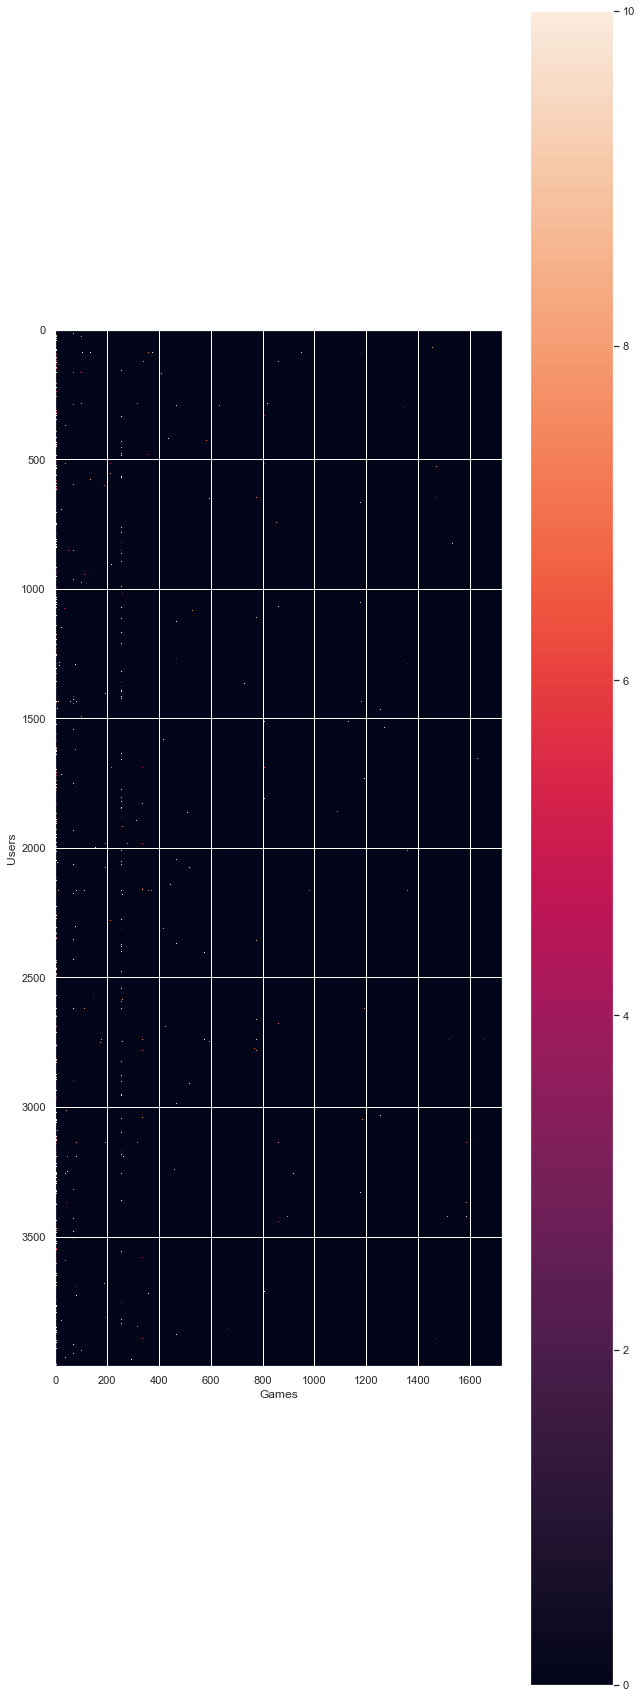

In [21]:
plotData(modelData)

Visualizing the popularity of games based on number of ratings per game

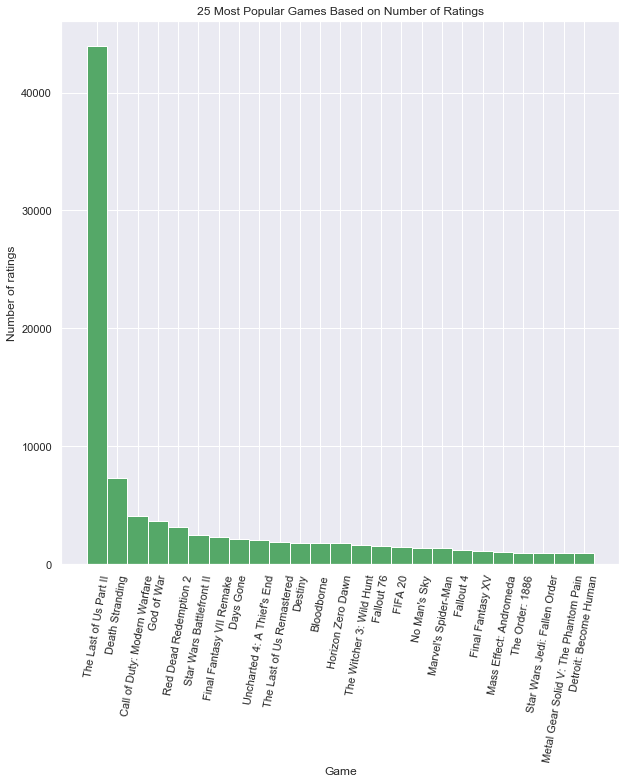

In [11]:
numVal = r - np.isnan(modelData.iloc[:, 1 : c]).sum()
mostPop = dict(numVal)
l = sorted(list(mostPop.items()),key = lambda x : x[1], reverse = True)
mostPop = dict(l)
mostPop = {k: mostPop[k] for k in list(mostPop)[:25]}

w = 0.05
x_axis = np.arange(0, len(mostPop.keys())*w, w) 

fig, ax = plt.subplots(figsize = (10, 10))
ax.bar(x_axis, mostPop.values(), width = w, color='g', align='center')
ax.set_xticks(x_axis)
ax.set_xticklabels(mostPop.keys(), rotation=80)
plt.ylabel("Number of ratings")
plt.xlabel("Game")
plt.title("25 Most Popular Games Based on Number of Ratings")
plt.show()

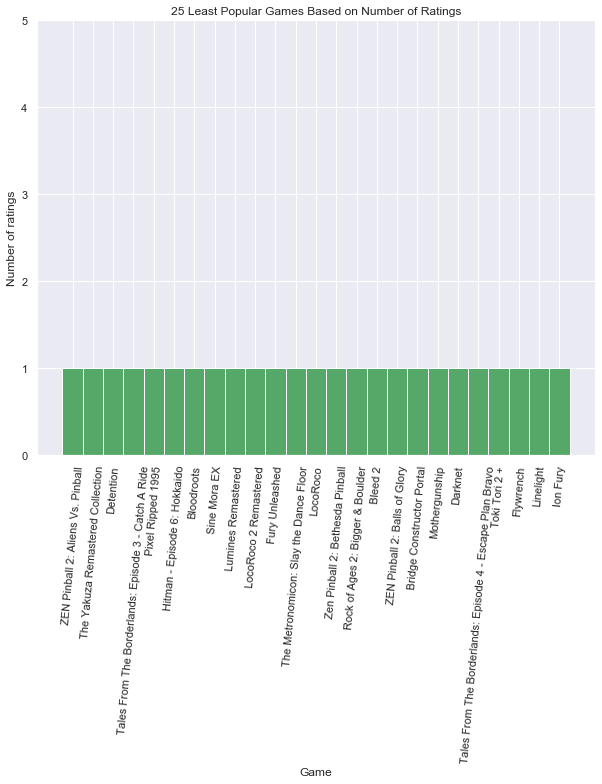

In [12]:
leastPop = dict(numVal)
l = sorted(list(leastPop.items()),key = lambda x : x[1], reverse = False)
leastPop = dict(l)
leastPop = {k: leastPop[k] for k in list(leastPop)[:25]}

w = 0.05
x_axis = np.arange(0, len(leastPop.keys())*w, w) 

fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(x_axis, leastPop.values(), width = w, color='g', align='center')
ax.set_xticks(x_axis)
ax.set_xticklabels(leastPop.keys(), rotation=85)
axes = plt.gca()
axes.set_ylim([0, 5])
plt.ylabel("Number of ratings")
plt.xlabel("Game")
plt.title("25 Least Popular Games Based on Number of Ratings")
plt.show()

Plotting the top 25 games based on average rating

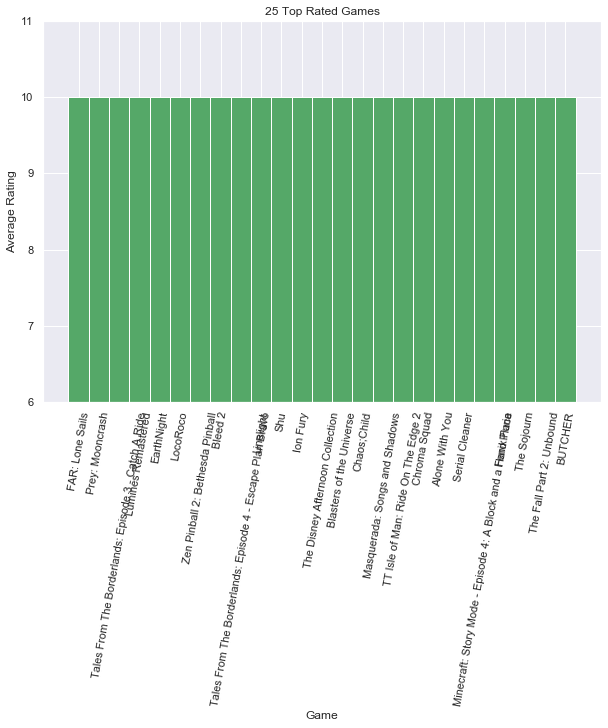

In [13]:
meanVal = modelData.mean()
# meanVal = dict((y,x) for x,y in meanVal.items())
l = list(meanVal.items())
l = sorted(list(meanVal.items()),key = lambda x : x[1], reverse = True)
meanVal = dict(l)
# meanVal = dict((y,x) for x,y in meanVal.items())
meanVal = {k: meanVal[k] for k in list(meanVal)[:25]}

w = 0.05
x_axis = np.arange(0, len(meanVal.keys())*w, w) 

fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(x_axis, meanVal.values(), width = w, color='g', align='center')
ax.set_xticks(x_axis)
ax.set_xticklabels(meanVal.keys(), rotation=80)
axes = plt.gca()
axes.set_ylim([6, 11])
plt.ylabel("Average Rating")
plt.xlabel("Game")
plt.title("25 Top Rated Games")
plt.show()

Plotting the games that have lowest average rating

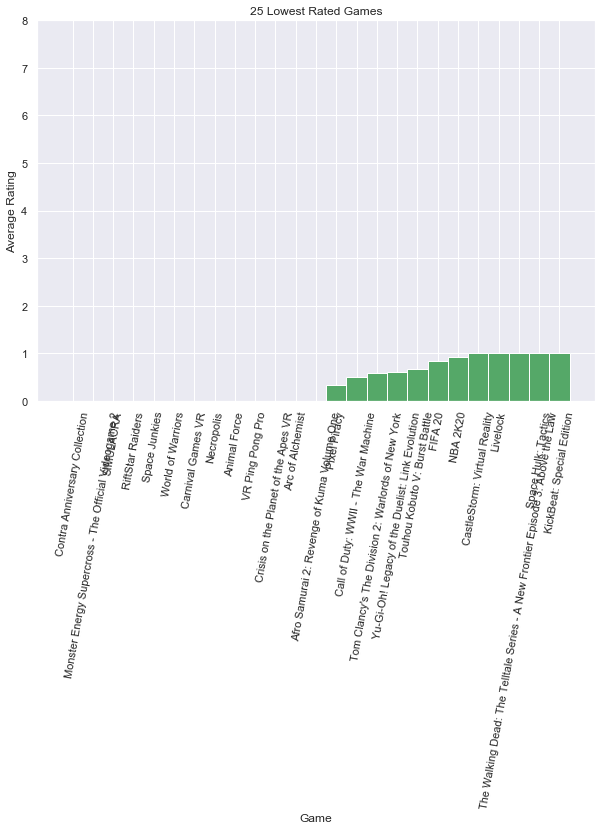

In [14]:
meanValMin = modelData.mean()
l = sorted(list(meanValMin.items()),key = lambda x : x[1], reverse = False)
meanValMin = dict(l)
meanValMin = {k: meanValMin[k] for k in list(meanValMin)[:25]}

w = 0.05
x_axis = np.arange(0, len(meanValMin.keys())*w, w) 

fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(x_axis, meanValMin.values(), width = w, color='g', align='center')
ax.set_xticks(x_axis)
ax.set_xticklabels(meanValMin.keys(), rotation=80)
axes = plt.gca()
axes.set_ylim([0,8])
plt.ylabel("Average Rating")
plt.xlabel("Game")
plt.title("25 Lowest Rated Games")
plt.show()

Text(0.5, 1.05, 'Avg. Rating vs. No. of Ratings')

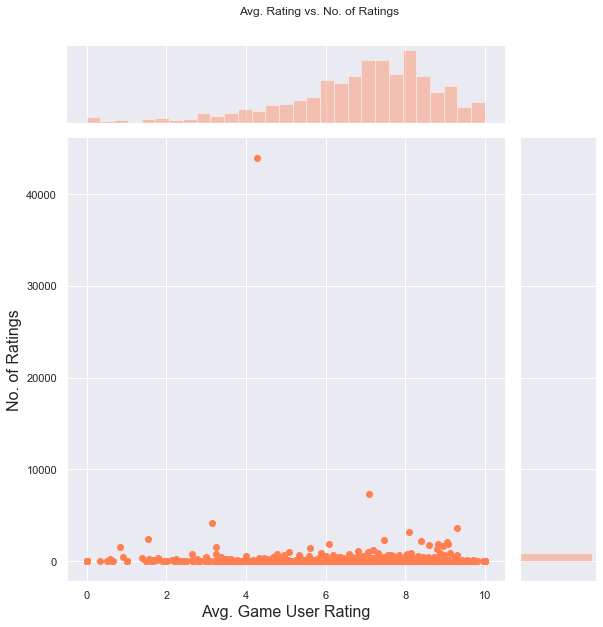

In [15]:
#Plot a graph between average user rating and number of ratings

numVal = r - np.isnan(modelData.iloc[:, 1 : c]).sum()
numRatings = list(dict(numVal).values())
avgRating = list(dict(modelData.mean()).values())
ax = sb.jointplot(avgRating, numRatings, height = 8, color = "coral")
ax.set_axis_labels('Avg. Game User Rating', 'No. of Ratings', fontsize=16)
ax.fig.suptitle("Avg. Rating vs. No. of Ratings", y=1.05)

In [17]:
num_ratings_per_user = 1723 - np.isnan(modelData.iloc[:, 1:]).sum(axis = 1)
num_ratings_per_game = 113339 - np.isnan(modelData.iloc[:, 1:]).sum()

In [18]:
print("Number of Users with less than 5 ratings : ", len(num_ratings_per_user[num_ratings_per_user < 5]))
print("Number of Games with less than 5 ratings : ", len(num_ratings_per_game[num_ratings_per_game < 5]))

Number of Users with less than 5 ratings :  109677
Number of Games with less than 5 ratings :  520


In [19]:
print("Number of Users with more than 20 ratings : ", len(num_ratings_per_user[num_ratings_per_user > 20]))
print("Number of Games with more than 20 ratings : ", len(num_ratings_per_game[num_ratings_per_game > 20]))

Number of Users with more than 20 ratings :  325
Number of Games with more than 20 ratings :  595


Now that exploratory analysis is completed, we have a good idea about the data we are dealing with. We can now start to prepare the dataset for training and testing. This will be carried out in separate files which can be found in the repository.